# Problema 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Parte a) 

Primero generamos las constantes, y los valores de dopado a usar de entrada. Calculamos los valores en $x$=0 para el campo eléctrico $\overrightarrow{E}$ y el potencial interno $\phi$.

In [2]:
NA=1.0e15;
ND=2.0e14;
q=1.6e-19;
k=8.616e-5;
kT=0.0259;
e0=8.85e-14;
KS=11.8;
ni=1.0e10;
Vbi=kT*(np.log((ND*NA)/(ni**2)));
print ("El potencial interno en equilibrio del diodo es: %3.4f V" % Vbi)


El potencial interno en equilibrio del diodo es: 0.5547 V


Generamos el espacio lineal de graficación y calculamos las funciones.
Para ello debemos primero generar los dominios en cada eje.

Para VA=: -20.00, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  1.057E-03 cm, xp=  2.115E-04 cm, W=  1.269E-03 cm
En x=0 el campo electrico es: -3.174E+04 V/cm, y la tensión es: 3.4258 V.
Emax= -3.491E+04 V/cm
Vmax = 22.610 V
Para VA=: -10.00, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  7.577E-04 cm, xp=  1.515E-04 cm, W=  9.092E-04 cm
En x=0 el campo electrico es: -2.274E+04 V/cm, y la tensión es: 1.7591 V.
Para VA=: -5.00, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  5.497E-04 cm, xp=  1.099E-04 cm, W=  6.596E-04 cm
En x=0 el campo electrico es: -1.650E+04 V/cm, y la tensión es: 0.9258 V.
Para VA=: -2.50, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  4.076E-04 cm, xp=  8.152E-05 cm, W=  4.891E-04 cm
En x=0 el campo electrico es: -1.224E+04 V/cm, y la tensión es: 0.5091 V.
Para VA=: 0.00, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  

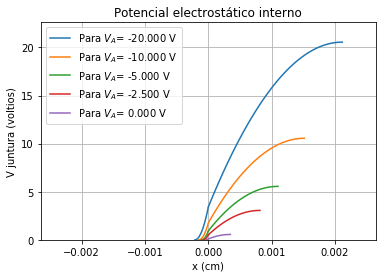

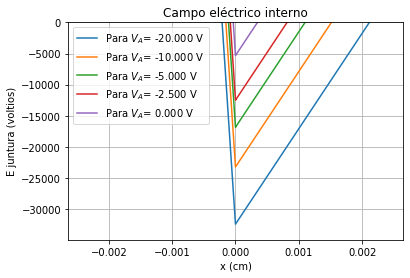

In [5]:
VA_List= [-20.0, -10.0, -5, -2.5, 0]
VA_max=max(VA_List)

# Definimos las figuras. Una para E y otra para phi
fig1 = plt.figure(1)
fig2 = plt.figure(2)

#Vamos iterando por los valores de VA especificados.
#Vamos iterando por metodo alternativo para conocer el indice
for i in range(len(VA_List)):

    VA=VA_List[i];
    #Calculamos xn, xp, W
    X=(2*KS*e0)*(Vbi-VA)/q;
    xn=np.sqrt(X*NA/(ND*(NA+ND)));
    xp=np.sqrt(X*ND/(NA*(NA+ND)));
    W=xn+xp

    #Imprimimos los valores para este tracto
    print ("Para VA=: %3.2f, con NA= %10.3E /cm3, ND=%10.3E /cm3" % (VA, NA, ND));
    
    print ("se tiene que: Vbi= %3.2f V, xn= %10.3E cm, xp= %10.3E cm, W= %10.3E cm" % (Vbi, xn, xp, W));
    
    #Variables electrostaticas para el lado P
    x = np.linspace(-xp,0);
    Vp=(q*NA/(2*KS*e0))*((xp+x)**2);
    Ep=-(q*NA/(KS*e0))*(xp+x);

    #Variables electrostaticas para el lado N
    xx = np.linspace(0,xn);
    Vn=(Vbi-VA)-(q*ND/(2*KS*e0))*((xn-xx)**2);
    En=-(q*ND/(KS*e0))*(xn-xx);
    print("En x=0 el campo electrico es: %10.3E V/cm, y la tensión es: %4.4f V." % (En[1], Vn[0]))
      #Vamos a graficar (primero debemos saber si estamos en el primer valor de VA)
    #print(i)
    if (i==0) :
        Emax=1.1*En[1];
        Vmax=1.1*np.max(Vn);
        xmax=2.5*max(xn,xp);
        print ("Emax= %10.3E V/cm" % (Emax))
        print ("Vmax = %3.3f V" % (Vmax))
        # Graficamos 
    Vtot=np.append(Vp,Vn[0:]);
    extra_x= np.linspace(0,2*xn)
    x_axis=np.append(x,extra_x[0:]);
    #x_axis=np.append(x,xx);
    plt.figure(1)
    plt.plot(x_axis, Vtot, label='Para $V_A$= %3.3f V' % VA)
    #plt.plot(x, Vp, xx, Vn, label='Para $V_A$=$-20$ V')
    plt.xlabel("x (cm)")
    plt.ylabel("V juntura (voltios)")
    plt.xlim(-xmax, xmax)
    plt.title('Potencial electrostático interno')
    plt.legend()
    plt.ylim(0, Vmax)
    plt.grid(True)
    plt.figure(2)
    Etot=np.append(Ep,En[0:]);
    plt.plot(x_axis, Etot, label='Para $V_A$= %3.3f V' % VA)
    #plt.plot(x, Vp, xx, Vn, label='Para $V_A$=$-20$ V')
    plt.xlabel("x (cm)")
    plt.ylabel("E juntura (voltios)")
    plt.xlim(-xmax, xmax)
    plt.title('Campo eléctrico interno')
    plt.legend()
    plt.ylim(Emax, 0)
    plt.grid(True)
    
    

## Parte b) 

Regeneramos los gráficos para $\overrightarrow{E}$ y $\phi$ para un $V_A$=$-20$ V, para distintas combinaciones de $N_A$ y $N_D$

Para VA=: -20.00, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  1.057E-03 cm, xp=  2.115E-04 cm, W=  1.269E-03 cm
En x=0 el campo electrico es: -3.174E+04 V/cm, y la tensión es: 3.4258 V.
Emax= -3.491E+04 V/cm
Vmax = 22.610 V
Para VA=: -10.00, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  7.577E-04 cm, xp=  1.515E-04 cm, W=  9.092E-04 cm
En x=0 el campo electrico es: -2.274E+04 V/cm, y la tensión es: 1.7591 V.
Para VA=: -5.00, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  5.497E-04 cm, xp=  1.099E-04 cm, W=  6.596E-04 cm
En x=0 el campo electrico es: -1.650E+04 V/cm, y la tensión es: 0.9258 V.
Para VA=: -2.50, con NA=  1.000E+15 /cm3, ND= 2.000E+14 /cm3
se tiene que: Vbi= 0.55 V, xn=  4.076E-04 cm, xp=  8.152E-05 cm, W=  4.891E-04 cm
En x=0 el campo electrico es: -1.224E+04 V/cm, y la tensión es: 0.5091 V.


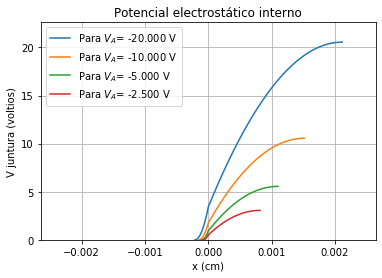

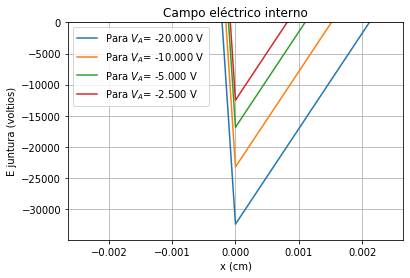

In [4]:
Doping_List= [[1e17, 1e15], [1e16, 1e15]]
VA=-20.0;

# Definimos las figuras. Una para E y otra para phi
fig1 = plt.figure(1)
fig2 = plt.figure(2)

#Vamos iterando por los valores de VA especificados.
#Vamos iterando por metodo alternativo para conocer el indice
for i in range(len(VA_List)):

    VA=VA_List[i];
    #Calculamos xn, xp, W
    X=(2*KS*e0)*(Vbi-VA)/q;
    xn=np.sqrt(X*NA/(ND*(NA+ND)));
    xp=np.sqrt(X*ND/(NA*(NA+ND)));
    W=xn+xp

    #Imprimimos los valores para este tracto
    print ("Para VA=: %3.2f, con NA= %10.3E /cm3, ND=%10.3E /cm3" % (VA, NA, ND));
    
    print ("se tiene que: Vbi= %3.2f V, xn= %10.3E cm, xp= %10.3E cm, W= %10.3E cm" % (Vbi, xn, xp, W));
    
    #Variables electrostaticas para el lado P
    x = np.linspace(-xp,0);
    Vp=(q*NA/(2*KS*e0))*((xp+x)**2);
    Ep=-(q*NA/(KS*e0))*(xp+x);

    #Variables electrostaticas para el lado N
    xx = np.linspace(0,xn);
    Vn=(Vbi-VA)-(q*ND/(2*KS*e0))*((xn-xx)**2);
    En=-(q*ND/(KS*e0))*(xn-xx);
    print("En x=0 el campo electrico es: %10.3E V/cm, y la tensión es: %4.4f V." % (En[1], Vn[0]))
      #Vamos a graficar (primero debemos saber si estamos en el primer valor de VA)
    #print(i)
    if (i==0) :
        Emax=1.1*En[1];
        Vmax=1.1*np.max(Vn);
        xmax=2.5*max(xn,xp);
        print ("Emax= %10.3E V/cm" % (Emax))
        print ("Vmax = %3.3f V" % (Vmax))
        # Graficamos 
    Vtot=np.append(Vp,Vn[0:]);
    extra_x= np.linspace(0,2*xn)
    x_axis=np.append(x,extra_x[0:]);
    #x_axis=np.append(x,xx);
    plt.figure(1)
    plt.plot(x_axis, Vtot, label='Para $V_A$= %3.3f V' % VA)
    #plt.plot(x, Vp, xx, Vn, label='Para $V_A$=$-20$ V')
    plt.xlabel("x (cm)")
    plt.ylabel("V juntura (voltios)")
    plt.xlim(-xmax, xmax)
    plt.title('Potencial electrostático interno')
    plt.legend()
    plt.ylim(0, Vmax)
    plt.grid(True)
    plt.figure(2)
    Etot=np.append(Ep,En[0:]);
    plt.plot(x_axis, Etot, label='Para $V_A$= %3.3f V' % VA)
    #plt.plot(x, Vp, xx, Vn, label='Para $V_A$=$-20$ V')
    plt.xlabel("x (cm)")
    plt.ylabel("E juntura (voltios)")
    plt.xlim(-xmax, xmax)
    plt.title('Campo eléctrico interno')
    plt.legend()
    plt.ylim(Emax, 0)
    plt.grid(True)